# Laboratorio 3

Si richiede un’implementazione della teoria sulle valenze di Patrick Hanks. In particolare, partendo da un corpus a scelta e uno specifico verbo (tendenzialmente non troppo frequente e/o generico ma nemmeno raro), l’idea è di costruire dei possibili cluster semantici, con relativa frequenza. Ad es. dato il verbo "to see" con valenza = 2, e usando un parser sintattico (ad es. Spacy), si possono collezionare eventuali fillers per i ruoli di subj e obj del verbo, per poi convertirli in semantic types. Un cluster frequente su "to see" potrebbe unire subj = noun.person con obj = noun.artifact. Si richiede di partire da un corpus di almeno alcune centinaia di istanze del verbo.

In [11]:
import pandas as pd
import spacy

In [78]:
corpus = pd.read_csv('english_wikipedia_sentence.csv')
corpus.head(5)

,sentence
0,"<s> By the time of the French Revolution some,..."
1,<s> Many workers and activists saw Bolshevik s...
2,<s> The revolutionary wave of 1917–23 saw the ...
3,<s> Italy saw the first struggles between anar...
4,<s> Anarcho-pacifism became influential in the...


In [102]:
parser = spacy.load('en_core_web_sm')

verbs = {}
for sentence in corpus['sentence']:
    sentence = sentence.replace('<s>', '').replace('</s>', '').replace('"', '').replace("'", '')[1:]
    parsified_sentence = parser(sentence)
    #spacy.displacy.render(parsified_sentence, style="dep", options={"compact": True}) # visualizza il grafo

    for token in parsified_sentence:
        #print(token.head.text, '\t--', token.dep_, '-->\t', token.text, '(', token.pos_, ')')
        if token.head.pos_ == 'VERB':
            if token.head.lemma_ not in verbs:
                verbs[token.head.lemma_] = {
                    'nsubj': [],
                    'dobj': []
                }

            if token.dep_ == 'nsubj':
                verbs[token.head.lemma_]['nsubj'].append(token.text)
            elif token.dep_ == 'dobj':
                verbs[token.head.lemma_]['dobj'].append(token.text)


verbs

{'begin': {'nsubj': ['some', 'Chaucer', 'plants'], 'dobj': ['trend']},
 'use': {'nsubj': ['that', 'translations', 'who'],
  'dobj': ['term',
   'equations',
   'pesticides',
   'yupana',
   'pitch',
   'hypothesis']},
 'see': {'nsubj': ['workers',
   'wave',
   'Italy',
   'philosophy',
   'which',
   'Italy',
   'rate',
   'table',
   'Odysseus',
   'he',
   'who',
   'Lincoln',
   'they',
   'they',
   'we',
   'he',
   'I',
   'it',
   'Lord',
   'Gershwin',
   'Secretary',
   'I',
   'Rand',
   'some',
   'century',
   'studies',
   'Jung',
   'animators',
   'she',
   'Greeks',
   'we',
   'he',
   'that',
   'he',
   '1993',
   'Boys',
   'he',
   'they',
   'portions',
   'Crescent',
   'goats',
   'Ages',
   'distortions',
   'crops',
   'who',
   'one',
   'period',
   'BC',
   'abacus',
   'crew',
   'he',
   'they',
   'who',
   'Borman',
   'crew',
   'that',
   'year',
   'historians',
   'quarter',
   'it',
   'Swift'],
  'dobj': ['government',
   'success',
   'participa

In [105]:
#per ogni verbo in verbs stampa un albero con i soggetti e gli oggetti
for verb in verbs:
    print(verb)
    print('\t', 'nsubj')
    for nsubj in verbs[verb]['nsubj']:
        print('\t\t', nsubj)
    print('\t', 'dobj')
    for dobj in verbs[verb]['dobj']:
        print('\t\t', dobj)
    print('-----------------------------')

begin
	 nsubj
		 some
		 Chaucer
		 plants
	 nsubj
		 trend
-----------------------------
use
	 nsubj
		 that
		 translations
		 who
	 nsubj
		 term
		 equations
		 pesticides
		 yupana
		 pitch
		 hypothesis
-----------------------------
see
	 nsubj
		 workers
		 wave
		 Italy
		 philosophy
		 which
		 Italy
		 rate
		 table
		 Odysseus
		 he
		 who
		 Lincoln
		 they
		 they
		 we
		 he
		 I
		 it
		 Lord
		 Gershwin
		 Secretary
		 I
		 Rand
		 some
		 century
		 studies
		 Jung
		 animators
		 she
		 Greeks
		 we
		 he
		 that
		 he
		 1993
		 Boys
		 he
		 they
		 portions
		 Crescent
		 goats
		 Ages
		 distortions
		 crops
		 who
		 one
		 period
		 BC
		 abacus
		 crew
		 he
		 they
		 who
		 Borman
		 crew
		 that
		 year
		 historians
		 quarter
		 it
		 Swift
	 nsubj
		 government
		 success
		 participation
		 struggles
		 state
		 Anarchism
		 naturism
		 anarchism
		 Anarchism
		 naturism
		 anarchism
		 Anarchism
		 naturism
		 anarchism
		 it
		 struggle
		 non
		 -
		 

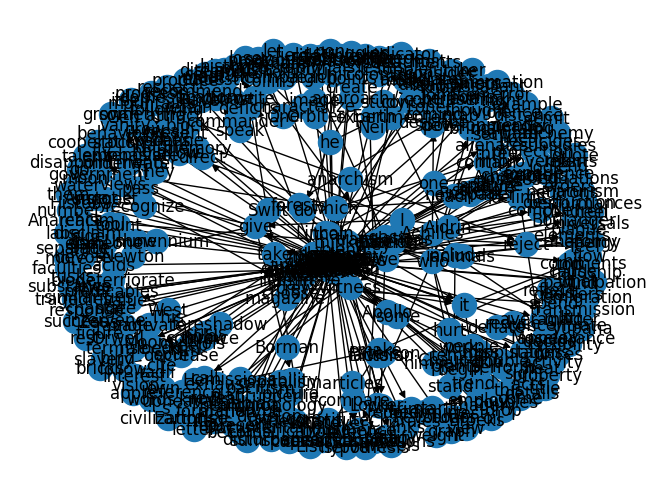